In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # For optional color mapping
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import csv
import os

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("data/ms2_data.csv", 
                 quoting=csv.QUOTE_NONE, 
                 on_bad_lines='skip', 
                 encoding='utf-8', 
                 engine='python')
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2940734 entries, ('59848', '"This is so cool. It\'s like') to ('7194639', '"I still can\'t figure why a pizza in AK cost more than a pizza in Washington/Idaho/Kentucky/etc etc. The only answer I get is ""shipping charges"". I guess Costco does not incur a shipping charge because there is no price difference. If I am going to be charged extra')
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   object 
 1   comment_text                         object 
 2   toxic                                object 
 3   severe_toxicity                      object 
 4   obscene                              object 
 5   identity_attack                      object 
 6   insult                               object 
 7   threat                               object 
 8   asian                                object 
 9   atheist         

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,2091481,1877004,1764414,1704909,1671898,1411333,798084,504965,357521,355016,...,1625022,1625022,1625020,1625020,1.625019e+06,1.625019e+06,1.625019e+06,1.305412e+06,554245.000000,187888.000000
unique,934320,413076,130613,76803,47067,29238,18050,10488,6412,4093,...,51823,47,126,142,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
freq,844148,1258131,1444016,1417558,1373344,1221785,707060,479893,344077,344500,...,939514,1328435,1333731,1079637,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.141324e-01,7.461874e-01,2.220359e+00,5.825374e+00,6.348535,8.438889
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.646338e+00,8.697238e+00,1.904116e+01,3.967186e+01,36.953070,38.600001
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000e-01,0.000000e+00,4.000000e+00,4.000000e+00,5.000000,6.000000


In [4]:
df.columns.tolist()

['id',
 'comment_text',
 'toxic',
 'severe_toxicity',
 'obscene',
 'identity_attack',
 'insult',
 'threat',
 'asian',
 'atheist',
 'bisexual',
 'black',
 'buddhist',
 'christian',
 'female',
 'heterosexual',
 'hindu',
 'homosexual_gay_or_lesbian',
 'intellectual_or_learning_disability',
 'jewish',
 'latino',
 'male',
 'muslim',
 'other_disability',
 'other_gender',
 'other_race_or_ethnicity',
 'other_religion',
 'other_sexual_orientation',
 'physical_disability',
 'psychiatric_or_mental_illness',
 'transgender',
 'white',
 'created_date',
 'publication_id',
 'parent_id',
 'article_id',
 'rating',
 'funny',
 'wow',
 'sad',
 'likes',
 'disagree',
 'sexual_explicit',
 'identity_annotator_count',
 'toxicity_annotator_count']

In [5]:
print("Shape:", df.shape)

Shape: (2940734, 45)


In [6]:
file_path = "data/ms2_data.csv"
size_bytes = os.path.getsize(file_path)

size_mb = size_bytes / (1024 * 1024)
size_gb = size_bytes / (1024 * 1024 * 1024)

print(f"File size: {size_mb:.2f} MB ({size_gb:.4f} GB)")

File size: 820.46 MB (0.8012 GB)


In [7]:
missing_summary = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing_summary, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
missing_df


,Missing Count,Missing %
toxicity_annotator_count,2752846,93.610847
physical_disability,2589931,88.070903
other_sexual_orientation,2589923,88.070631
other_religion,2589922,88.070597
other_race_or_ethnicity,2589916,88.070393
other_gender,2589913,88.070291
other_disability,2589903,88.069951
muslim,2589897,88.069747
male,2589889,88.069475
latino,2589866,88.068693


In [10]:
# Step 1: Drop columns with more than 50% missing values
missing_percent = df.isnull().mean()
columns_to_drop = missing_percent[missing_percent > 0.50].index

df_cleaned = df.drop(columns=columns_to_drop)
print("Dropped columns due to missingness > 50%:")
print(columns_to_drop.tolist())

# Step 2: Drop rows with missing comment_text
df_cleaned = df_cleaned.dropna(subset=['comment_text'])

# Step 3: Drop rows with missing values in available label columns
original_label_cols = ['toxic', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
existing_label_cols = [col for col in original_label_cols if col in df_cleaned.columns]
dropped_labels = [col for col in original_label_cols if col not in df_cleaned.columns]

df_cleaned = df_cleaned.dropna(subset=existing_label_cols)

print("\nLabel columns dropped due to missingness:")
print(dropped_labels)

print("\nLabel columns used:")
print(existing_label_cols)

# Step 4: Impute reaction features with 0 (if they exist)
reaction_cols = ['likes', 'funny', 'wow', 'sad', 'disagree', 'rating']
existing_reaction_cols = [col for col in reaction_cols if col in df_cleaned.columns]
df_cleaned[existing_reaction_cols] = df_cleaned[existing_reaction_cols].fillna(0)

# Step 5: Impute identity attributes with 0 (if they exist)
identity_keywords = [
    'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual',
    'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino',
    'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion',
    'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white'
]
existing_identity_cols = [col for col in identity_keywords if col in df_cleaned.columns]
df_cleaned[existing_identity_cols] = df_cleaned[existing_identity_cols].fillna(0)

# Step 6: Drop metadata columns (not used in analysis)
metadata_cols_to_drop = ['created_date', 'publication_id', 'parent_id', 'article_id']
existing_metadata_cols = [col for col in metadata_cols_to_drop if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=existing_metadata_cols)

# Final output
print("\nFinal cleaned dataset shape:", df_cleaned.shape)

Dropped columns due to missingness > 50%:
['identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion', 'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count']

Label columns dropped due to missingness:
['identity_attack', 'insult', 'threat']

Label columns used:
['toxic', 'severe_toxicity', 'obscene']

Final cleaned dataset shape: (1671781, 11)


- We applied a 50% missingness threshold, droppped columns with >50% missing values 
- Important text and label columns (like `comment_text`, `toxic`, etc.) had decent amounts of missingness, so we remoced rows with missing target labels or text
- Then reaction features (`likes`, `wow`, etc.) were assumed to be zero when missing


In [12]:
label_cols = ['toxic', 'severe_toxicity', 'obscene']

# Convert to numeric (coerce any weird values to NaN)
for col in label_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Then binarize using a threshold
for col in label_cols:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: 1 if x >= 0.5 else 0)

# Confirm class distribution
for col in label_cols:
    print(f"\n{col.upper()} distribution:")
    print(df_cleaned[col].value_counts())



TOXIC distribution:
toxic
0    1649606
1      22175
Name: count, dtype: int64

SEVERE_TOXICITY distribution:
severe_toxicity
0    1645437
1      26344
Name: count, dtype: int64

OBSCENE distribution:
obscene
0    1623964
1      47817
Name: count, dtype: int64


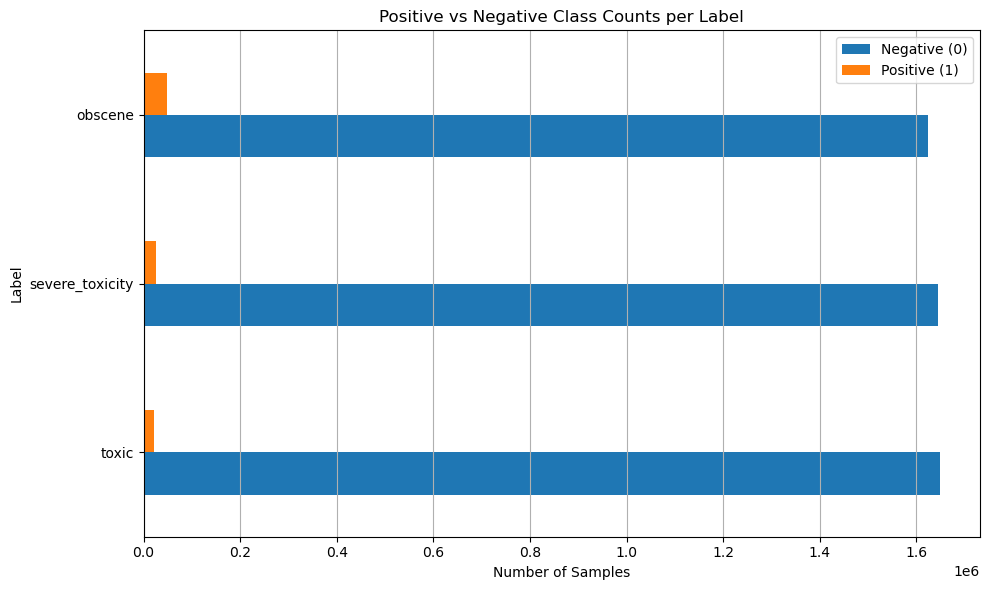

In [14]:
# Label columns
label_cols = ['toxic', 'severe_toxicity', 'obscene']

# Get value counts for each label
label_distributions = {
    col: df_cleaned[col].value_counts() for col in label_cols
}

# Create a DataFrame for easy plotting
dist_df = pd.DataFrame(label_distributions).T
dist_df.columns = ['Negative (0)', 'Positive (1)']
dist_df = dist_df.sort_values('Positive (1)')

# Plot
dist_df.plot(kind='barh', stacked=False, figsize=(10, 6))
plt.title("Positive vs Negative Class Counts per Label")
plt.xlabel("Number of Samples")
plt.ylabel("Label")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

From this, we see that we have very imbalanced classes across all predictors. This isn't great because that means a model could just predict '0' and be correct 97% of the time in most cases. To fix this, we might do resampling to fix the imbalance.